In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
x=wine.data

In [4]:
target_list = []
for i in wine.target:
    op = [0,0,0]
    op[i] = 1
    target_list.append(op)

In [5]:
y = target_list

In [6]:
scaler = MinMaxScaler()

In [7]:
x = scaler.fit_transform(x)

In [8]:
y = np.array(y)

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [10]:
def sigmoid(x):
    return (1)/(1+np.exp(-x))

In [11]:
def dsigmoid(x):  #differentiation of sigmoid
    return x*(1-x)

In [12]:
np.random.seed(3)
w0 = np.random.random((13,50))-1
w1 = np.random.random((50,26))-1
w2 = np.random.random((26,13))-1
w3 = np.random.random((13,3))-1

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

In [13]:
def feed_forward(data_in,w0,w1,w2,w3,b0,b1,b2,b3):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = sigmoid(np.dot(layer1,w1)+b1)
    layer3 = sigmoid(np.dot(layer2,w2)+b2)
    layer4 = sigmoid(np.dot(layer3,w3)+b3)
    
    return layer0,layer1,layer2,layer3,layer4

In [14]:
def back_propagation(layer0,layer1,layer2,layer3,layer4,actual_y,w0,w1,w2,w3,b0,b1,b2,b3,learning_rate,i):
    
    l4_error = layer4 - actual_y  # difference of predicted value - actual value
    l4_delta = l4_error * dsigmoid(layer4) #
    dh4 = np.dot(layer3.T,l4_delta)
    
    l3_error = np.dot(l4_delta,w3.T)
    l3_delta = l3_error * dsigmoid(layer3)
    dh3 = np.dot(layer2.T,l3_delta)
    
    l2_error = np.dot(l3_delta,w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T,l1_delta)
    
    w3 = w3-(learning_rate * dh4)
    w2 = w2-(learning_rate * dh3)
    w1 = w1-(learning_rate * dh2)
    w0 = w0-(learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
   
    if i%1==0 and (i!=0):
        loss = np.mean(np.power(layer4 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100==0:
            print('\n',int(i),loss)
            
    return w0,w1,w2,w3,b0,b1,b2,b3
        

In [15]:
def accuracy(testx,testy):
    correct = 0
    layer0,layer1,layer2,layer3,layer4 = feed_forward(testx,w0,w1,w2,w3,b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i])==np.argmax(testy[i]):
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}"

In [16]:
epochs = 1000
loss_curve = []
iters = []

In [17]:
for i in range(epochs):
    layer0,layer1,layer2,layer3,layer4 = feed_forward(xtrain,w0,w1,w2,w3,b0,b1,b2,b3)
    w0,w1,w2,w3,b0,b1,b2,b3 = back_propagation(layer0,layer1,layer2,layer3,layer4,ytrain,w0,w1,w2,w3,b0,b1,b2,b3,0.05,i)


 100 0.21122339082754776

 200 0.17737603094708002

 300 0.1575921017402776

 400 0.1505956982333971

 500 0.14710359103482293

 600 0.1449058660617673

 700 0.14330359310198398

 800 0.1420453215318989

 900 0.14102864124702597


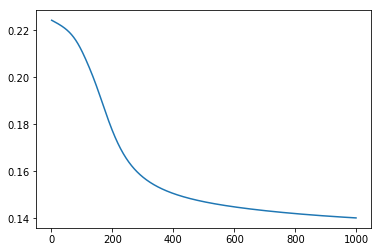

In [18]:
plt.plot(iters,loss_curve)

In [19]:
feed_forward(xtest[13],w0,w1,w2,w3,b0,b1,b2,b3)

(array([0.16315789, 0.18379447, 0.67379679, 0.79381443, 0.19565217,
        0.32413793, 0.26793249, 0.50943396, 0.29337539, 0.11262799,
        0.71544715, 0.71062271, 0.20256776]),
 array([[0.03074053, 0.01756401, 0.84517889, 0.07168263, 0.06855376,
         0.05702405, 0.24636717, 0.02352423, 0.02428554, 0.13230453,
         0.32131576, 0.12750423, 0.09374881, 0.01414008, 0.01906203,
         0.13250974, 0.02907295, 0.00933161, 0.01790263, 0.01228238,
         0.02651313, 0.05940616, 0.0500518 , 0.04066443, 0.03749629,
         0.09636291, 0.38134167, 0.02855581, 0.08909439, 0.01038949,
         0.02057204, 0.8012475 , 0.02209619, 0.75550549, 0.01505411,
         0.03339461, 0.3534136 , 0.0999624 , 0.29778165, 0.14554327,
         0.16391418, 0.01617298, 0.06121562, 0.05272811, 0.14834278,
         0.01551379, 0.02908782, 0.02254914, 0.45363204, 0.01329437]]),
 array([[0.00459449, 0.00629749, 0.01033698, 0.00570741, 0.0055014 ,
         0.00460877, 0.00491473, 0.00444396, 0.00598998,

In [20]:
ytest[13]

array([0, 1, 0])

In [21]:
accuracy(xtest,ytest)

'Accuracy: 38.888888888888886'